<a href="https://colab.research.google.com/github/Bunnybunny1120/Master_Thesis_2023/blob/main/With_Imputation_22_June.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Building pipeline code derived from:  https://www.freecodecamp.org/news/machine-learning-pipeline/**

Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from scipy.stats import randint, uniform
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer,KNNImputer
from scipy.stats import sem
import seaborn as sns
##visualize Pipeline
from sklearn import set_config
set_config(display="diagram")
import warnings
#suppress warnings
warnings.filterwarnings('ignore')


In the factual data group, 5 features are obtained from domain knowldege and we are able to keep extra 4 features after filtering out missing values
1. Phosphorus (PO4, mg/L)(domain knowldege)
2. Winkler_DO: dissolved oxygen (DO, mg/L)(domain knowldege)
3. Temp (domain knowldege)
4. BOD5 (domain knowldege)
5. pH (domain knowldege)
6. Conductivity
7. Top_Nitrate
8. Top_Ammonium
9. TSS

Target: Chlorophyll-a (Chl-a, μg/L)

Importing data

In [ ]:

df_no_impu = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/no_imput_june2.csv')
df_version1 = df_no_impu.loc[:, ['Winkler_DO', 'Temp','Total_Phosphorus', 'BOD5', 'PH', 'Top_Chlorophyll_A']]
df_version1 = df_version1.dropna()
df_version1_impu =df_no_impu.iloc[df_version1.index, :]
print('manual feature slection of 5 features shape incl target:', df_version1.shape)
df_version1 = df_version1_impu.dropna(axis = 1)
print('no imputation with factual data  given the selected rows incl target', df_version1.shape)

df_version1_impu =df_no_impu.iloc[df_version1.index, :]
print('imputation with all columns incl target:', df_version1_impu.shape)


manual feature slection of 5 features shape incl target: (1572, 6)
no imputation with factual data  given the selected rows incl target (1572, 10)
imputation with all columns incl target: (1572, 33)


Spliting data into training 80% and test 20%

In [ ]:

x = df_version1_impu.drop('Top_Chlorophyll_A', axis = 1)
y = df_version1_impu['Top_Chlorophyll_A']
print('dataset with imputation shape, excluding target', x.shape)
print('target shape', y.shape)

# Split the data into train80%, and test sets 20%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

print(X_train.size, X_test.size)

dataset with imputation shape, excluding target (1572, 32)
target shape (1572,)
40224 10080


In [ ]:
df_version1_impu.columns

Index(['Site_Depth', 'Secchi_Depth', 'Top_Turbidity', 'Light_Trans',
       'Conductivity', 'Salinity', 'Fluorometer', 'Top_PARR', 'Top_Par',
       'Current_Speed', 'Wind_Speed', 'Sea_State', 'Temp', 'Top_Nitrate',
       'Top_Ammonium', 'Total_Phosphorus', 'Top_Silica', 'Top_DOC',
       'Winkler_DO', 'ORP', 'O2', 'CTD_PH', 'PH', 'TSS', 'BOD5', 'BOD_Oakwood',
       'Coliform', 'Top Enterococci', 'Top_FeCo', 'Wind_Direction',
       'Current_Direction', 'Weather', 'Top_Chlorophyll_A'],
      dtype='object')

# **Median Imputation Preprocessor**

In [ ]:

numeric_processor=Pipeline(
    steps=[("imputation_median", SimpleImputer(missing_values=np.nan, strategy= "median")),
          ("scaler", StandardScaler())])

categorical_processor=Pipeline(
    steps=[("imputation_consatnt", SimpleImputer(fill_value="missing", strategy= "constant")),
          ("onehot", OneHotEncoder(handle_unknown= "ignore"))])

## combine processing technqiues
preprocessor = ColumnTransformer(
    [("categorical", categorical_processor,['Wind_Direction', 'Current_Direction',
                                            'Weather']),
    ("numerical", numeric_processor,['Site_Depth', 'Secchi_Depth', 'Top_Turbidity',
                                     'Light_Trans', 'Conductivity', 'Salinity',
                                     'Fluorometer', 'Top_PARR', 'Top_Par',
                                     'Current_Speed', 'Wind_Speed', 'Sea_State',
                                     'Temp', 'Top_Nitrate', 'Top_Ammonium',
                                     'Total_Phosphorus', 'Top_Silica',
                                     'Top_DOC', 'Winkler_DO', 'ORP', 'O2', 'CTD_PH',
                                     'PH', 'TSS', 'BOD5', 'BOD_Oakwood', 'Coliform',
                                     'Top Enterococci', 'Top_FeCo'])])


# **Baseline Random Forest with Median imputation**

In [ ]:
pipe_RF = make_pipeline( preprocessor, RandomForestRegressor(random_state=12))
pipe_RF

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_consatnt',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Wind_Direction',
                                                   'Current_Direction',
                                                   'Weather']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_median',
                                                                   SimpleImputer(stra...
                                                   'Conductivity', 'Salinity',
                                                   'Fluorometer', 'Top_PARR',
                                                   'Top_Par', 'Current_Speed',
                                                   'Wind_Speed', 'Sea_State',
                                                   'Temp', 'Top_Nitrate',
                                                   'Top_Ammonium',
                                                   'Total_Phosphorus',
                                                   'Top_Silica', 'Top_DOC',
                                                   'Winkler_DO', 'ORP', 'O2',
                                                   'CTD_PH', 'PH', 'TSS',
                                                   'BOD5', 'BOD_Oakwood',
                                                   'Coliform',
                                                   'Top Enterococci',
                                                   'Top_FeCo'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=12))])

Best hyperparameters: {'randomforestregressor__criterion': 'poisson', 'randomforestregressor__max_depth': 41, 'randomforestregressor__max_features': 'sqrt', 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 12, 'randomforestregressor__n_estimators': 248}

RF test Root Mean Squared Error: 9.69050290080326
RF test Mean Absolute Error: 6.162140872935603
RF test R-squared: 0.8003368204381283

RF cross-validation mean R-squared: 0.8165421188765707 +/- 0.016892889183361445
RF cross-validation mean RMSE: 10.672172888904566 +/- 0.722849209300403
RF cross-validation mean MAE: 6.849369648411027 +/- 0.3432506230444693


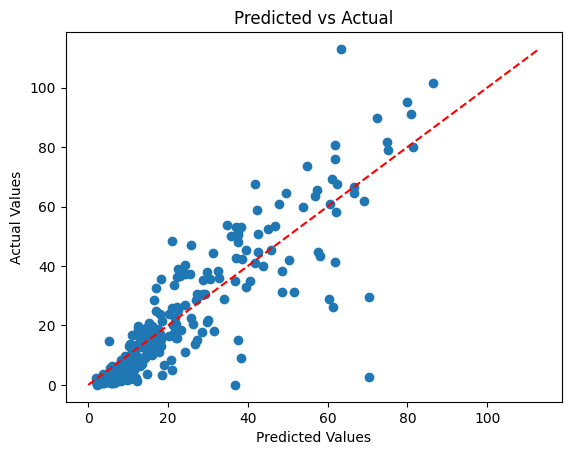

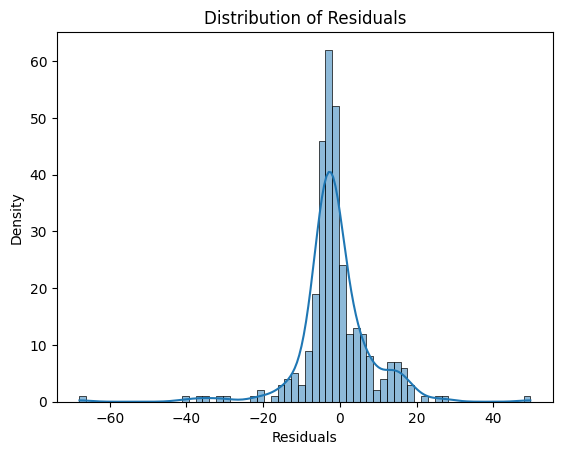

In [ ]:
# Define the parameter grid for random search
param_grid = {
    'randomforestregressor__n_estimators': randint(50, 301),
    'randomforestregressor__max_depth': randint(20, 51),
    'randomforestregressor__min_samples_split': randint(2, 21),
    'randomforestregressor__min_samples_leaf': randint(1, 21),
    'randomforestregressor__max_features': ['sqrt', 'log2', 1],
    'randomforestregressor__criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
}

# Perform random search with cross-validation on the training set
random_search = RandomizedSearchCV(pipe_RF, param_distributions=param_grid, n_iter=11, cv=5, scoring='neg_mean_squared_error', random_state=12)
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print(f"Best hyperparameters: {random_search.best_params_}")

# Train the model with the best hyperparameters on the training set
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print()
print(f"RF test Root Mean Squared Error: {rmse_test}")
print(f"RF test Mean Absolute Error: {mae_test}")
print(f"RF test R-squared: {r2_test}")

# Evaluate the best model using cross-validation and report R2, RMSE, MAE, and STD
cv_r2_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
cv_rmse_scores = np.sqrt(-cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
cv_mae_scores = -cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

cv_r2_mean = np.mean(cv_r2_scores)
cv_rmse_mean = np.mean(cv_rmse_scores)
cv_mae_mean = np.mean(cv_mae_scores)

cv_r2_se = sem(cv_r2_scores)
cv_rmse_se = sem(cv_rmse_scores)
cv_mae_se = sem(cv_mae_scores)

print()
print(f"RF cross-validation mean R-squared: {cv_r2_mean} +/- {cv_r2_se}")
print(f"RF cross-validation mean RMSE: {cv_rmse_mean} +/- {cv_rmse_se}")
print(f"RF cross-validation mean MAE: {cv_mae_mean} +/- {cv_mae_se}")

residuals = y_test - y_pred_test

# Plotting the predicted vs actual values
plt.scatter(y_pred_test, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs Actual')
plt.show()

sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution of Residuals')
plt.show()

## **SVR Median imputation**

In [ ]:
pipe_SVR = make_pipeline(preprocessor, SVR())
pipe_SVR

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_consatnt',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Wind_Direction',
                                                   'Current_Direction',
                                                   'Weather']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_median',
                                                                   SimpleImputer(stra...
                                                  ['Site_Depth', 'Secchi_Depth',
                                                   'Top_Turbidity',
                                                   'Light_Trans',
                                                   'Conductivity', 'Salinity',
                                                   'Fluorometer', 'Top_PARR',
                                                   'Top_Par', 'Current_Speed',
                                                   'Wind_Speed', 'Sea_State',
                                                   'Temp', 'Top_Nitrate',
                                                   'Top_Ammonium',
                                                   'Total_Phosphorus',
                                                   'Top_Silica', 'Top_DOC',
                                                   'Winkler_DO', 'ORP', 'O2',
                                                   'CTD_PH', 'PH', 'TSS',
                                                   'BOD5', 'BOD_Oakwood',
                                                   'Coliform',
                                                   'Top Enterococci',
                                                   'Top_FeCo'])])),
                ('svr', SVR())])

Best hyperparameters: {'svr__C': 80.22653822840017, 'svr__degree': 5, 'svr__epsilon': 1.1637301740168982, 'svr__gamma': 'scale', 'svr__kernel': 'rbf', 'svr__shrinking': False, 'svr__tol': 0.0005099450852813556}

SVR test Root Mean Squared Error: 9.594717814872007
SVR test Mean Absolute Error: 5.709204600832704
SVR test R-squared: 0.8042644259231778

SVR cross-validation mean R-squared: 0.8427420631219402 +/- 0.018253309283247223
SVR cross-validation mean RMSE: 9.826780571889753 +/- 0.6143158223301458
SVR cross-validation mean MAE: 6.15003910475666 +/- 0.2674838037465829


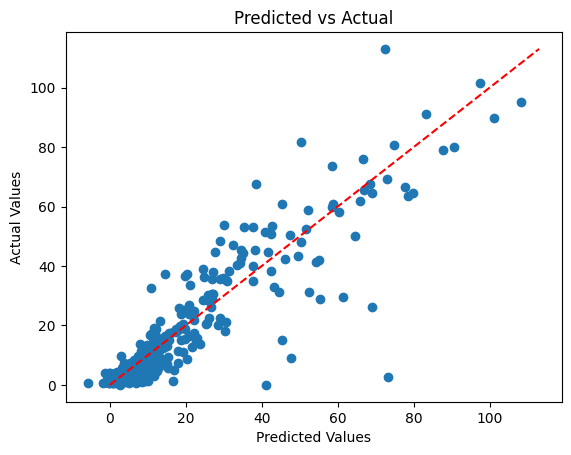

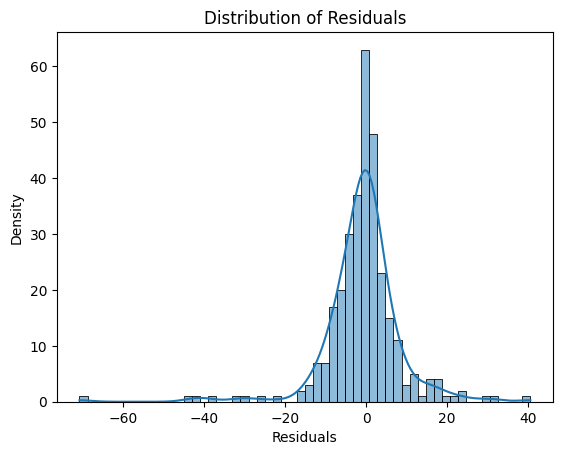

In [ ]:

# Define the parameter grid for random search
param_dist = {
    'svr__C': uniform(0.1, 100),
    'svr__kernel': ['linear', 'poly', 'rbf'],
    'svr__degree': randint(0, 6),
    'svr__epsilon': uniform(0.001, 10),
    'svr__gamma': ['scale', 'auto'],
    'svr__shrinking': [True, False],
    'svr__tol': uniform(1e-5, 1e-3),
}

# Perform random search with cross-validation on the training set
random_search = RandomizedSearchCV(pipe_SVR, param_distributions=param_dist, n_iter=5, cv=5, scoring='neg_mean_squared_error', random_state=12)
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print(f"Best hyperparameters: {random_search.best_params_}")

# Train the model with the best hyperparameters on the training set
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print()
print(f"SVR test Root Mean Squared Error: {rmse_test}")
print(f"SVR test Mean Absolute Error: {mae_test}")
print(f"SVR test R-squared: {r2_test}")

# Evaluate the best model using cross-validation and report R2, RMSE, MAE, and STD
cv_r2_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
cv_rmse_scores = np.sqrt(-cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
cv_mae_scores = -cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

cv_r2_mean = np.mean(cv_r2_scores)
cv_rmse_mean = np.mean(cv_rmse_scores)
cv_mae_mean = np.mean(cv_mae_scores)

cv_r2_se = sem(cv_r2_scores)
cv_rmse_se = sem(cv_rmse_scores)
cv_mae_se = sem(cv_mae_scores)

print()
print(f"SVR cross-validation mean R-squared: {cv_r2_mean} +/- {cv_r2_se}")
print(f"SVR cross-validation mean RMSE: {cv_rmse_mean} +/- {cv_rmse_se}")
print(f"SVR cross-validation mean MAE: {cv_mae_mean} +/- {cv_mae_se}")

residuals = y_test - y_pred_test

# Plotting the predicted vs actual values
plt.scatter(y_pred_test, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs Actual')
plt.show()

sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution of Residuals')
plt.show()

## **ANN with Median Imputation**





Best hyperparameters: {'mlpregressor__activation': 'logistic', 'mlpregressor__alpha': 0.3795504577114115, 'mlpregressor__batch_size': 100, 'mlpregressor__beta_1': 0.3194763109335812, 'mlpregressor__beta_2': 0.2914566850066529, 'mlpregressor__early_stopping': False, 'mlpregressor__epsilon': 1e-08, 'mlpregressor__hidden_layer_sizes': 197, 'mlpregressor__learning_rate': 'adaptive', 'mlpregressor__learning_rate_init': 0.00912707031795312, 'mlpregressor__momentum': 0.3694738186070894, 'mlpregressor__n_iter_no_change': 5, 'mlpregressor__nesterovs_momentum': False, 'mlpregressor__power_t': 0.7956740312285981, 'mlpregressor__shuffle': False, 'mlpregressor__solver': 'sgd', 'mlpregressor__tol': 5.75762263380688e-05, 'mlpregressor__validation_fraction': 0.41861143293176695, 'mlpregressor__warm_start': True}

ANN test Root Mean Squared Error: 9.907082950656124
ANN test Mean Absolute Error: 6.477002368579874
ANN test R-squared: 0.7913122533872852

ANN cross-validation mean R-squared: 0.836701476458

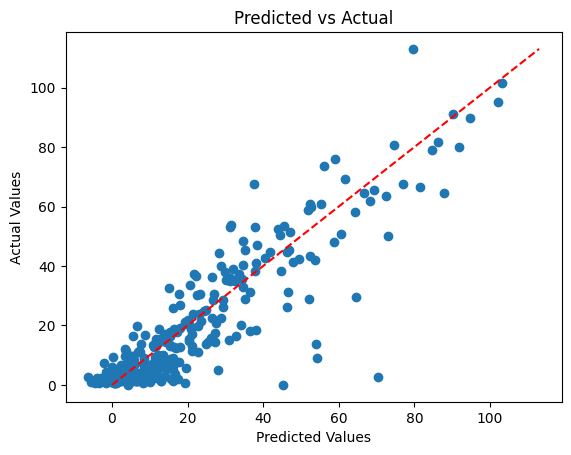

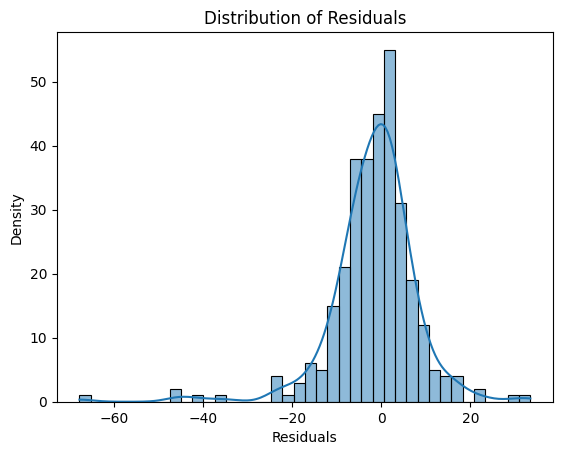

In [ ]:
#13m
pipe_ANN = make_pipeline(preprocessor, MLPRegressor(max_iter=2000, random_state=12))

# Define the parameter distribution for the ANN
param_dist = {
    'mlpregressor__hidden_layer_sizes': randint(50, 201),
    'mlpregressor__activation': ['identity', 'logistic', 'tanh', 'relu'],
    'mlpregressor__solver': ['sgd', 'adam'],
    'mlpregressor__alpha': uniform(0.0001, 1),
    'mlpregressor__n_iter_no_change': randint(5, 20),
    'mlpregressor__early_stopping': [True, False],
    'mlpregressor__learning_rate_init': uniform(0.0001, 0.01),
    'mlpregressor__shuffle': [True, False],
    'mlpregressor__tol': uniform(1e-5, 1e-3),
    'mlpregressor__warm_start': [True, False],
    'mlpregressor__learning_rate': ['constant', 'invscaling', 'adaptive'],
    'mlpregressor__power_t': uniform(0.1, 1.0),
    'mlpregressor__momentum': uniform(0.1, 1),
    'mlpregressor__nesterovs_momentum': [True, False],
    'mlpregressor__beta_1': uniform(0, 1.0),
    'mlpregressor__beta_2': uniform(0, 1.0),
    'mlpregressor__epsilon': [1e-8, 1e-7, 1e-9],
    'mlpregressor__validation_fraction': uniform(0.1, 1),
    'mlpregressor__batch_size': ['auto', 100, 200]
}



# only for 'sgd'
# 'mlpregressor__learning_rate': ['constant', 'invscaling', 'adaptive'],
# 'mlpregressor__power_t': [stats.uniform(0.1, 1.0)
# 'mlpregressor__momentum': uniform(0.1, 1),
# 'mlpregressor__nesterovs_momentum': [True, False],

# only for 'adam'
# 'mlpregressor__beta_1': [0.9, 0.95, 0.99],
# 'mlpregressor__beta_2': [0.999, 0.9, 0.95],
# 'mlpregressor__epsilon': [1e-8, 1e-7, 1e-9],

#  Only effective when solver=’sgd’ or ‘adam’.
# 'mlpregressor__validation_fraction': uniform(0.1, 1), when early stoping is true

#  max_funint, default=15000 Only used when solver=’lbfgs’.
# 'mlpregressor__max_fun': [15000, 20000, 25000]

# batch_sizeint, default=’auto’
# Size of minibatches for stochastic optimizers. If the solver is ‘lbfgs’, the regressor will not use minibatch. When set to “auto”, batch_size=min(200, n_samples).
 # 'mlpregressor__batch_size': ['auto', 100, 200],

# param_dist = {
#     'mlpregressor__hidden_layer_sizes': randint(50, 201),
#     'mlpregressor__activation': ['identity', 'logistic', 'tanh', 'relu'],
#     'mlpregressor__solver': ['sgd', 'adam'],
#     'mlpregressor__alpha': uniform(0.0001, 1),
#     'mlpregressor__n_iter_no_change': randint(5, 20),
#     'mlpregressor__early_stopping': [True, False],
#     'mlpregressor__learning_rate_init': uniform(0.0001, 0.01),
#     'mlpregressor__shuffle': [True, False],
#     'mlpregressor__tol': uniform(1e-5, 1e-3),
#     'mlpregressor__warm_start': [True, False],
#     'mlpregressor__learning_rate': ['constant', 'invscaling', 'adaptive'],
#     'mlpregressor__power_t': uniform(0.1, 1.0),
#     'mlpregressor__momentum': uniform(0.1, 1),
#     'mlpregressor__nesterovs_momentum': [True, False],
#     'mlpregressor__beta_1': uniform(0, 1.0),
#     'mlpregressor__beta_2': uniform(0, 1.0),
#     'mlpregressor__epsilon': [1e-8, 1e-7, 1e-9],
#     'mlpregressor__validation_fraction': uniform(0.1, 1),
#     'mlpregressor__max_fun': [15000, 20000, 25000],
#     'mlpregressor__batch_size': ['auto', 100, 200]
# }


# Perform random search with cross-validation on the training set
random_search = RandomizedSearchCV(pipe_ANN, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=12)
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print(f"Best hyperparameters: {random_search.best_params_}")

# Train the model with the best hyperparameters on the training set
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print()
print(f"ANN test Root Mean Squared Error: {rmse_test}")
print(f"ANN test Mean Absolute Error: {mae_test}")
print(f"ANN test R-squared: {r2_test}")

# Evaluate the best model using cross-validation and report R2, RMSE, MAE, and STD
cv_r2_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
cv_rmse_scores = np.sqrt(-cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
cv_mae_scores = -cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

cv_r2_mean = np.mean(cv_r2_scores)
cv_rmse_mean = np.mean(cv_rmse_scores)
cv_mae_mean = np.mean(cv_mae_scores)

cv_r2_se = sem(cv_r2_scores)
cv_rmse_se = sem(cv_rmse_scores)
cv_mae_se = sem(cv_mae_scores)

print()
print(f"ANN cross-validation mean R-squared: {cv_r2_mean} +/- {cv_r2_se}")
print(f"ANN cross-validation mean RMSE: {cv_rmse_mean} +/- {cv_rmse_se}")
print(f"ANN cross-validation mean MAE: {cv_mae_mean} +/- {cv_mae_se}")

residuals = y_test - y_pred_test

# Plotting the predicted vs actual values
plt.scatter(y_pred_test, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs Actual')
plt.show()

sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution of Residuals')
plt.show()

KNN Imputation Preprocessor

In [ ]:
# create numeric and onehot encoding imputation step
numeric_processor=Pipeline(
    steps=[("imputation_KNN", KNNImputer(n_neighbors=9, weights="uniform")), # default n_neighbors =5
          ("scaler", StandardScaler())])

categorical_processor=Pipeline(
    steps=[("imputation_consatnt", SimpleImputer(fill_value="missing", strategy= "constant")),
          ("onehot", OneHotEncoder(handle_unknown= "ignore"))])

## combine processing technqiues
preprocessor = ColumnTransformer(
    [("categorical", categorical_processor,['Wind_Direction', 'Current_Direction',
                                            'Weather']),
    ("numerical", numeric_processor,['Site_Depth', 'Secchi_Depth', 'Top_Turbidity',
                                     'Light_Trans', 'Conductivity', 'Salinity',
                                     'Fluorometer', 'Top_PARR', 'Top_Par',
                                     'Current_Speed', 'Wind_Speed', 'Sea_State',
                                     'Temp', 'Top_Nitrate', 'Top_Ammonium',
                                     'Total_Phosphorus', 'Top_Silica',
                                     'Top_DOC', 'Winkler_DO', 'ORP', 'O2', 'CTD_PH',
                                     'PH', 'TSS', 'BOD5', 'BOD_Oakwood', 'Coliform',
                                     'Top Enterococci', 'Top_FeCo'])])


In [ ]:
pipe_RF = make_pipeline( preprocessor, RandomForestRegressor(random_state=12))
pipe_RF

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_consatnt',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Wind_Direction',
                                                   'Current_Direction',
                                                   'Weather']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_KNN',
                                                                   KNNImputer(n_neighbor...
                                                   'Conductivity', 'Salinity',
                                                   'Fluorometer', 'Top_PARR',
                                                   'Top_Par', 'Current_Speed',
                                                   'Wind_Speed', 'Sea_State',
                                                   'Temp', 'Top_Nitrate',
                                                   'Top_Ammonium',
                                                   'Total_Phosphorus',
                                                   'Top_Silica', 'Top_DOC',
                                                   'Winkler_DO', 'ORP', 'O2',
                                                   'CTD_PH', 'PH', 'TSS',
                                                   'BOD5', 'BOD_Oakwood',
                                                   'Coliform',
                                                   'Top Enterococci',
                                                   'Top_FeCo'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=12))])

Best hyperparameters: {'randomforestregressor__criterion': 'poisson', 'randomforestregressor__max_depth': 47, 'randomforestregressor__max_features': 'sqrt', 'randomforestregressor__min_samples_leaf': 3, 'randomforestregressor__min_samples_split': 6, 'randomforestregressor__n_estimators': 226}

RF test Root Mean Squared Error: 10.153952051229597
RF test Mean Absolute Error: 6.473282765368412
RF test R-squared: 0.7807823249068282

RF cross-validation mean R-squared: 0.7981487974889317 +/- 0.016371225810174046
RF cross-validation mean RMSE: 11.205886573987494 +/- 0.7061936995878916
RF cross-validation mean MAE: 7.144580584945794 +/- 0.3239116505166633


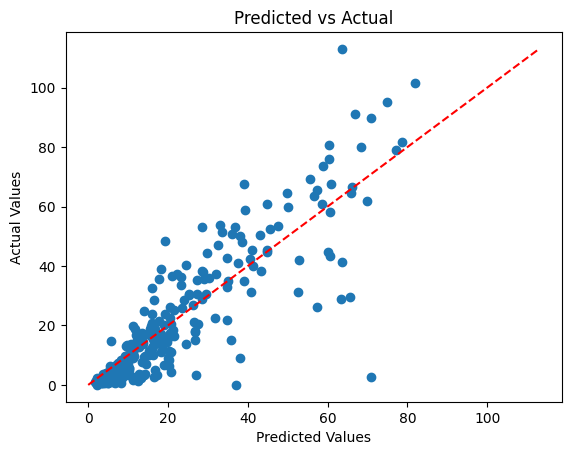

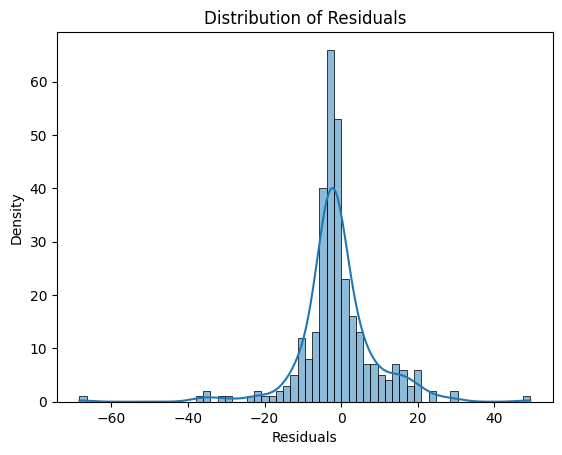

In [ ]:
# Define the parameter grid for random search
param_grid = {
    'randomforestregressor__n_estimators': randint(50, 301),
    'randomforestregressor__max_depth': randint(20, 51),
    'randomforestregressor__min_samples_split': randint(2, 21),
    'randomforestregressor__min_samples_leaf': randint(1, 21),
    'randomforestregressor__max_features': ['sqrt', 'log2', 1],
    'randomforestregressor__criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
}


# Perform random search with cross-validation on the training set
random_search = RandomizedSearchCV(pipe_RF, param_distributions=param_grid, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=12)
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print(f"Best hyperparameters: {random_search.best_params_}")

# Train the model with the best hyperparameters on the training set
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print()
print(f"RF test Root Mean Squared Error: {rmse_test}")
print(f"RF test Mean Absolute Error: {mae_test}")
print(f"RF test R-squared: {r2_test}")

# Evaluate the best model using cross-validation and report R2, RMSE, MAE, and STD
cv_r2_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
cv_rmse_scores = np.sqrt(-cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
cv_mae_scores = -cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

cv_r2_mean = np.mean(cv_r2_scores)
cv_rmse_mean = np.mean(cv_rmse_scores)
cv_mae_mean = np.mean(cv_mae_scores)

cv_r2_se = sem(cv_r2_scores)
cv_rmse_se = sem(cv_rmse_scores)
cv_mae_se = sem(cv_mae_scores)

print()
print(f"RF cross-validation mean R-squared: {cv_r2_mean} +/- {cv_r2_se}")
print(f"RF cross-validation mean RMSE: {cv_rmse_mean} +/- {cv_rmse_se}")
print(f"RF cross-validation mean MAE: {cv_mae_mean} +/- {cv_mae_se}")

residuals = y_test - y_pred_test

# Plotting the predicted vs actual values
plt.scatter(y_pred_test, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs Actual')
plt.show()

sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution of Residuals')
plt.show()

SVR KNN Imputation

In [ ]:
pipe_SVR = make_pipeline(preprocessor, SVR())
pipe_SVR

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_consatnt',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Wind_Direction',
                                                   'Current_Direction',
                                                   'Weather']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_KNN',
                                                                   KNNImputer(n_neighbor...
                                                  ['Site_Depth', 'Secchi_Depth',
                                                   'Top_Turbidity',
                                                   'Light_Trans',
                                                   'Conductivity', 'Salinity',
                                                   'Fluorometer', 'Top_PARR',
                                                   'Top_Par', 'Current_Speed',
                                                   'Wind_Speed', 'Sea_State',
                                                   'Temp', 'Top_Nitrate',
                                                   'Top_Ammonium',
                                                   'Total_Phosphorus',
                                                   'Top_Silica', 'Top_DOC',
                                                   'Winkler_DO', 'ORP', 'O2',
                                                   'CTD_PH', 'PH', 'TSS',
                                                   'BOD5', 'BOD_Oakwood',
                                                   'Coliform',
                                                   'Top Enterococci',
                                                   'Top_FeCo'])])),
                ('svr', SVR())])

Best hyperparameters: {'svr__C': 80.22653822840017, 'svr__degree': 5, 'svr__epsilon': 1.1637301740168982, 'svr__gamma': 'scale', 'svr__kernel': 'rbf', 'svr__shrinking': False, 'svr__tol': 0.0005099450852813556}

SVR test Root Mean Squared Error: 9.560346321470304
SVR test Mean Absolute Error: 5.728082325990489
SVR test R-squared: 0.8056642948181025

SVR cross-validation mean R-squared: 0.8388253289547579 +/- 0.015490068488858678
SVR cross-validation mean RMSE: 9.9729634358233 +/- 0.54230415192818
SVR cross-validation mean MAE: 6.2644899175346485 +/- 0.2529206912487676


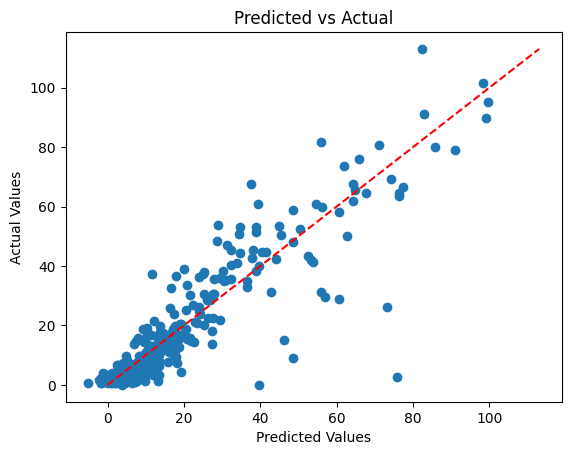

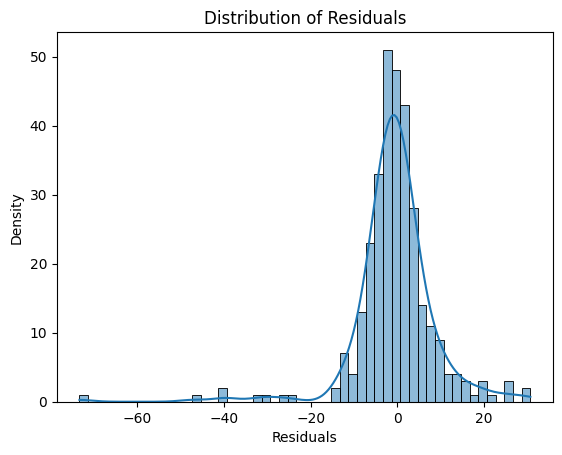

In [ ]:
# Define the parameter grid for random search
param_dist = {
    'svr__C': uniform(0.1, 100),
    'svr__kernel': ['linear', 'poly', 'rbf'],
    'svr__degree': randint(0, 6),
    'svr__epsilon': uniform(0.001, 10),
    'svr__gamma': ['scale', 'auto'],
    'svr__shrinking': [True, False],
    'svr__tol': uniform(1e-5, 1e-3),
}

# Perform random search with cross-validation on the training set
random_search = RandomizedSearchCV(pipe_SVR, param_distributions=param_dist, n_iter=5, cv=5, scoring='neg_mean_squared_error', random_state=12)
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print(f"Best hyperparameters: {random_search.best_params_}")

# Train the model with the best hyperparameters on the training set
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print()
print(f"SVR test Root Mean Squared Error: {rmse_test}")
print(f"SVR test Mean Absolute Error: {mae_test}")
print(f"SVR test R-squared: {r2_test}")

# Evaluate the best model using cross-validation and report R2, RMSE, MAE, and STD
cv_r2_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
cv_rmse_scores = np.sqrt(-cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
cv_mae_scores = -cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')


cv_r2_mean = np.mean(cv_r2_scores)
cv_rmse_mean = np.mean(cv_rmse_scores)
cv_mae_mean = np.mean(cv_mae_scores)

cv_r2_se = sem(cv_r2_scores)
cv_rmse_se = sem(cv_rmse_scores)
cv_mae_se = sem(cv_mae_scores)

print()
print(f"SVR cross-validation mean R-squared: {cv_r2_mean} +/- {cv_r2_se}")
print(f"SVR cross-validation mean RMSE: {cv_rmse_mean} +/- {cv_rmse_se}")
print(f"SVR cross-validation mean MAE: {cv_mae_mean} +/- {cv_mae_se}")

residuals = y_test - y_pred_test

# Plotting the predicted vs actual values
plt.scatter(y_pred_test, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs Actual')
plt.show()

sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution of Residuals')
plt.show()

ANN with KNN imputation

Best hyperparameters: {'mlpregressor__activation': 'logistic', 'mlpregressor__alpha': 0.3795504577114115, 'mlpregressor__batch_size': 100, 'mlpregressor__beta_1': 0.3194763109335812, 'mlpregressor__beta_2': 0.2914566850066529, 'mlpregressor__early_stopping': False, 'mlpregressor__epsilon': 1e-08, 'mlpregressor__hidden_layer_sizes': 197, 'mlpregressor__learning_rate': 'adaptive', 'mlpregressor__learning_rate_init': 0.00912707031795312, 'mlpregressor__momentum': 0.3694738186070894, 'mlpregressor__n_iter_no_change': 5, 'mlpregressor__nesterovs_momentum': False, 'mlpregressor__power_t': 0.7956740312285981, 'mlpregressor__shuffle': False, 'mlpregressor__solver': 'sgd', 'mlpregressor__tol': 5.75762263380688e-05, 'mlpregressor__validation_fraction': 0.41861143293176695, 'mlpregressor__warm_start': True}

ANN test Root Mean Squared Error: 10.313114568497316
ANN test Mean Absolute Error: 6.548654845948451
ANN test R-squared: 0.7738560176483951

ANN cross-validation mean R-squared: 0.83790114107

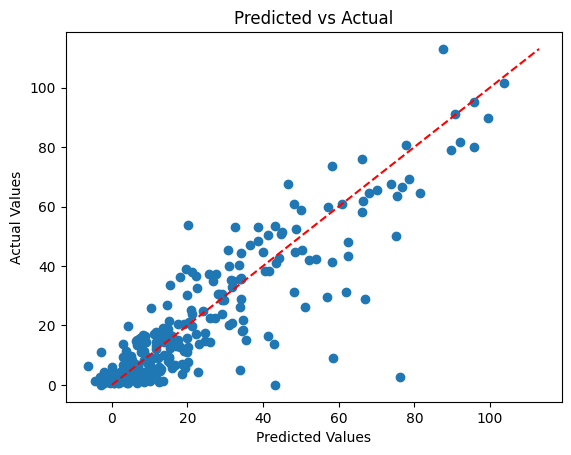

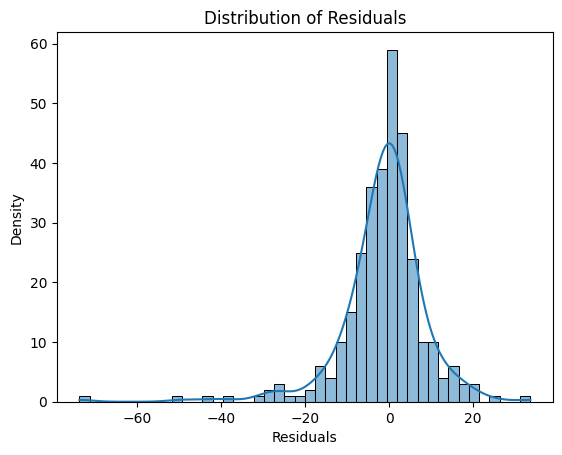

In [ ]:
#  13.58m
pipe_ANN = make_pipeline(preprocessor, MLPRegressor(max_iter=2000, random_state=12))

# Define the parameter distribution for the ANN
param_dist = {
    'mlpregressor__hidden_layer_sizes': randint(50, 201),
    'mlpregressor__activation': ['identity', 'logistic', 'tanh', 'relu'],
    'mlpregressor__solver': ['sgd', 'adam'],
    'mlpregressor__alpha': uniform(0.0001, 1),
    'mlpregressor__n_iter_no_change': randint(5, 20),
    'mlpregressor__early_stopping': [True, False],
    'mlpregressor__learning_rate_init': uniform(0.0001, 0.01),
    'mlpregressor__shuffle': [True, False],
    'mlpregressor__tol': uniform(1e-5, 1e-3),
    'mlpregressor__warm_start': [True, False],
    'mlpregressor__learning_rate': ['constant', 'invscaling', 'adaptive'],
    'mlpregressor__power_t': uniform(0.1, 1.0),
    'mlpregressor__momentum': uniform(0.1, 1),
    'mlpregressor__nesterovs_momentum': [True, False],
    'mlpregressor__beta_1': uniform(0, 1.0),
    'mlpregressor__beta_2': uniform(0, 1.0),
    'mlpregressor__epsilon': [1e-8, 1e-7, 1e-9],
    'mlpregressor__validation_fraction': uniform(0.1, 1),
    'mlpregressor__batch_size': ['auto', 100, 200]
}


# Perform random search with cross-validation on the training set
random_search = RandomizedSearchCV(pipe_ANN, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=12)
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print(f"Best hyperparameters: {random_search.best_params_}")

# Train the model with the best hyperparameters on the training set
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print()
print(f"ANN test Root Mean Squared Error: {rmse_test}")
print(f"ANN test Mean Absolute Error: {mae_test}")
print(f"ANN test R-squared: {r2_test}")

# Evaluate the best model using cross-validation and report R2, RMSE, MAE, and STD
cv_r2_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
cv_rmse_scores = np.sqrt(-cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
cv_mae_scores = -cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

cv_r2_mean = np.mean(cv_r2_scores)
cv_rmse_mean = np.mean(cv_rmse_scores)
cv_mae_mean = np.mean(cv_mae_scores)

cv_r2_se = sem(cv_r2_scores)
cv_rmse_se = sem(cv_rmse_scores)
cv_mae_se = sem(cv_mae_scores)

print()
print(f"ANN cross-validation mean R-squared: {cv_r2_mean} +/- {cv_r2_se}")
print(f"ANN cross-validation mean RMSE: {cv_rmse_mean} +/- {cv_rmse_se}")
print(f"ANN cross-validation mean MAE: {cv_mae_mean} +/- {cv_mae_se}")

residuals = y_test - y_pred_test

# Plotting the predicted vs actual values
plt.scatter(y_pred_test, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs Actual')
plt.show()

sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution of Residuals')
plt.show()

# MICE Imputation Preprocessor

In [ ]:
pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 6.6 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=7f16f598268eee701ce5a47f49c5f9b19420dc81031811d186284aa8fd6245cd
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11335 sha256=efa3af45286e05e4e4f993f2804916a31296ebb2e962870c10ebc1452bbb6c9a
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
from fancyimpute import IterativeImputer

numeric_processor=Pipeline(
    steps=[("imputation_mice", IterativeImputer(max_iter=50, random_state=12)),
           ("scaler", StandardScaler())])
from sklearn.preprocessing import OneHotEncoder
categorical_processor=Pipeline(
    steps=[("imputation_consatnt", SimpleImputer(fill_value="missing", strategy= "constant")),
          ("onehot", OneHotEncoder(handle_unknown= "ignore"))])

## combine processing technqiues
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    [("categorical", categorical_processor,['Wind_Direction', 'Current_Direction',
                                            'Weather']),
    ("numerical", numeric_processor,['Site_Depth', 'Secchi_Depth', 'Top_Turbidity',
                                     'Light_Trans', 'Conductivity', 'Salinity',
                                     'Fluorometer', 'Top_PARR', 'Top_Par',
                                     'Current_Speed', 'Wind_Speed', 'Sea_State',
                                     'Temp', 'Top_Nitrate', 'Top_Ammonium',
                                     'Total_Phosphorus', 'Top_Silica',
                                     'Top_DOC', 'Winkler_DO', 'ORP', 'O2', 'CTD_PH',
                                     'PH', 'TSS', 'BOD5', 'BOD_Oakwood', 'Coliform',
                                     'Top Enterococci', 'Top_FeCo'])])

Baseline Random Forest MICE Imputation

In [ ]:
pipe_RF = make_pipeline( preprocessor, RandomForestRegressor(random_state=12))
pipe_RF

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_consatnt',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Wind_Direction',
                                                   'Current_Direction',
                                                   'Weather']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mice',
                                                                   IterativeImputer(max...
                                                   'Conductivity', 'Salinity',
                                                   'Fluorometer', 'Top_PARR',
                                                   'Top_Par', 'Current_Speed',
                                                   'Wind_Speed', 'Sea_State',
                                                   'Temp', 'Top_Nitrate',
                                                   'Top_Ammonium',
                                                   'Total_Phosphorus',
                                                   'Top_Silica', 'Top_DOC',
                                                   'Winkler_DO', 'ORP', 'O2',
                                                   'CTD_PH', 'PH', 'TSS',
                                                   'BOD5', 'BOD_Oakwood',
                                                   'Coliform',
                                                   'Top Enterococci',
                                                   'Top_FeCo'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=12))])

Best hyperparameters: {'randomforestregressor__criterion': 'poisson', 'randomforestregressor__max_depth': 47, 'randomforestregressor__max_features': 'sqrt', 'randomforestregressor__min_samples_leaf': 3, 'randomforestregressor__min_samples_split': 6, 'randomforestregressor__n_estimators': 226}

RF test Root Mean Squared Error: 9.636777501609142
RF test Mean Absolute Error: 5.996316563050875
RF test R-squared: 0.8025446002084136

RF cross-validation mean R-squared: 0.8200138840906994 +/- 0.014392272512011531
RF cross-validation mean RMSE: 10.570815145788753 +/- 0.6022812672393023
RF cross-validation mean MAE: 6.71671364695065 +/- 0.19706760699020517


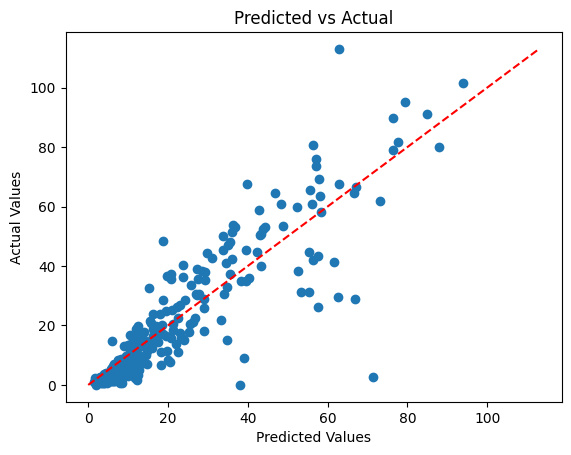

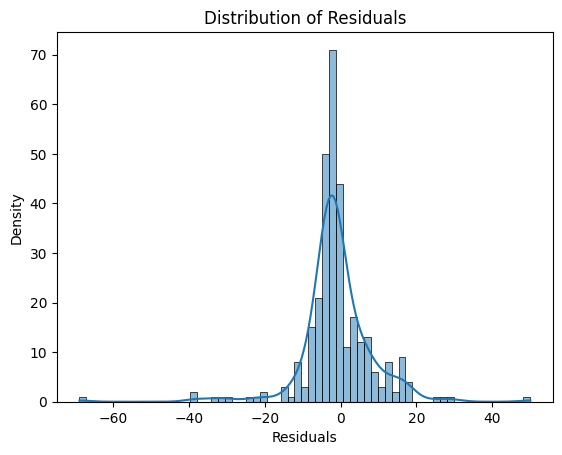

In [ ]:
#22m
# Define the parameter grid for random search
param_grid = {
    'randomforestregressor__n_estimators': randint(50, 301),
    'randomforestregressor__max_depth': randint(20, 51),
    'randomforestregressor__min_samples_split': randint(2, 21),
    'randomforestregressor__min_samples_leaf': randint(1, 21),
    'randomforestregressor__max_features': ['sqrt', 'log2', 1],
    'randomforestregressor__criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
}

pipe_RF = make_pipeline( preprocessor, RandomForestRegressor(random_state=12))
pipe_RF

# Perform random search with cross-validation on the training set
random_search = RandomizedSearchCV(pipe_RF, param_distributions=param_grid, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=12)
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print(f"Best hyperparameters: {random_search.best_params_}")

# Train the model with the best hyperparameters on the training set
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print()
print(f"RF test Root Mean Squared Error: {rmse_test}")
print(f"RF test Mean Absolute Error: {mae_test}")
print(f"RF test R-squared: {r2_test}")

# Evaluate the best model using cross-validation and report R2, RMSE, MAE, and STD
cv_r2_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
cv_rmse_scores = np.sqrt(-cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
cv_mae_scores = -cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

cv_r2_mean = np.mean(cv_r2_scores)
cv_rmse_mean = np.mean(cv_rmse_scores)
cv_mae_mean = np.mean(cv_mae_scores)

cv_r2_se = sem(cv_r2_scores)
cv_rmse_se = sem(cv_rmse_scores)
cv_mae_se = sem(cv_mae_scores)

print()
print(f"RF cross-validation mean R-squared: {cv_r2_mean} +/- {cv_r2_se}")
print(f"RF cross-validation mean RMSE: {cv_rmse_mean} +/- {cv_rmse_se}")
print(f"RF cross-validation mean MAE: {cv_mae_mean} +/- {cv_mae_se}")

residuals = y_test - y_pred_test

# Plotting the predicted vs actual values
plt.scatter(y_pred_test, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs Actual')
plt.show()

sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution of Residuals')
plt.show()

SVR MICE Imputation

In [ ]:
pipe_SVR = make_pipeline(preprocessor, SVR())
pipe_SVR

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_consatnt',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Wind_Direction',
                                                   'Current_Direction',
                                                   'Weather']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mice',
                                                                   IterativeImputer(max...
                                                  ['Site_Depth', 'Secchi_Depth',
                                                   'Top_Turbidity',
                                                   'Light_Trans',
                                                   'Conductivity', 'Salinity',
                                                   'Fluorometer', 'Top_PARR',
                                                   'Top_Par', 'Current_Speed',
                                                   'Wind_Speed', 'Sea_State',
                                                   'Temp', 'Top_Nitrate',
                                                   'Top_Ammonium',
                                                   'Total_Phosphorus',
                                                   'Top_Silica', 'Top_DOC',
                                                   'Winkler_DO', 'ORP', 'O2',
                                                   'CTD_PH', 'PH', 'TSS',
                                                   'BOD5', 'BOD_Oakwood',
                                                   'Coliform',
                                                   'Top Enterococci',
                                                   'Top_FeCo'])])),
                ('svr', SVR())])

Best hyperparameters: {'svr__C': 80.22653822840017, 'svr__degree': 5, 'svr__epsilon': 1.1637301740168982, 'svr__gamma': 'scale', 'svr__kernel': 'rbf', 'svr__shrinking': False, 'svr__tol': 0.0005099450852813556}

SVR test Root Mean Squared Error: 9.813860226083897
SVR test Mean Absolute Error: 5.543097389539086
SVR test R-squared: 0.7952211557658488

SVR cross-validation mean R-squared: 0.8227169496344071 +/- 0.01764213711766569
SVR cross-validation mean RMSE: 10.44847568118908 +/- 0.5118402422434174
SVR cross-validation mean MAE: 6.330527664988792 +/- 0.2169928298343128


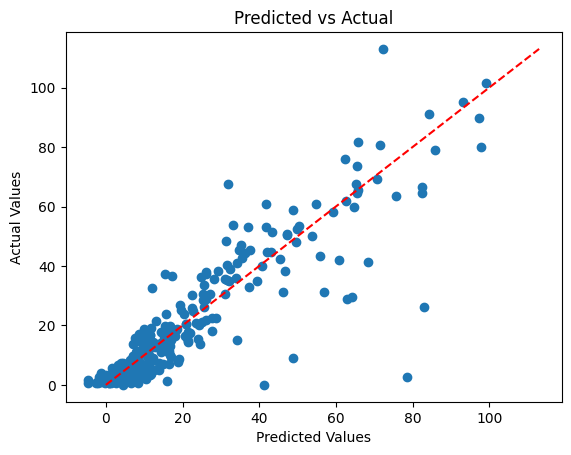

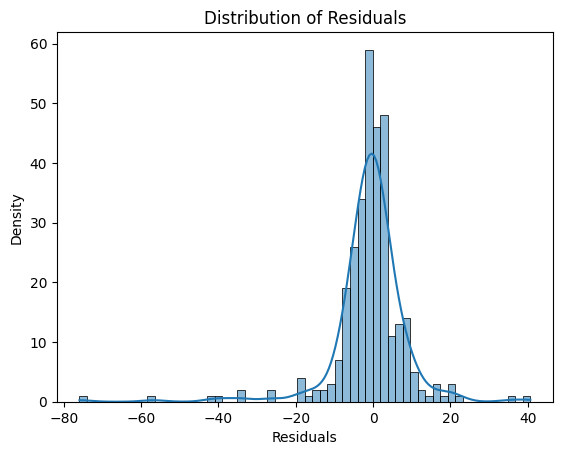

In [ ]:
# 8m
#  Define the parameter grid for random search
param_dist = {
    'svr__C': uniform(0.1, 100),
    'svr__kernel': ['linear', 'poly', 'rbf'],
    'svr__degree': randint(0, 6),
    'svr__epsilon': uniform(0.001, 10),
    'svr__gamma': ['scale', 'auto'],
    'svr__shrinking': [True, False],
    'svr__tol': uniform(1e-5, 1e-3),
}

# Perform random search with cross-validation on the training set
random_search = RandomizedSearchCV(pipe_SVR, param_distributions=param_dist, n_iter=5, cv=5, scoring='neg_mean_squared_error', random_state=12)
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print(f"Best hyperparameters: {random_search.best_params_}")

# Train the model with the best hyperparameters on the training set
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print()
print(f"SVR test Root Mean Squared Error: {rmse_test}")
print(f"SVR test Mean Absolute Error: {mae_test}")
print(f"SVR test R-squared: {r2_test}")

# Evaluate the best model using cross-validation and report R2, RMSE, MAE, and STD
cv_r2_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
cv_rmse_scores = np.sqrt(-cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
cv_mae_scores = -cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')


cv_r2_mean = np.mean(cv_r2_scores)
cv_rmse_mean = np.mean(cv_rmse_scores)
cv_mae_mean = np.mean(cv_mae_scores)

cv_r2_se = sem(cv_r2_scores)
cv_rmse_se = sem(cv_rmse_scores)
cv_mae_se = sem(cv_mae_scores)

print()
print(f"SVR cross-validation mean R-squared: {cv_r2_mean} +/- {cv_r2_se}")
print(f"SVR cross-validation mean RMSE: {cv_rmse_mean} +/- {cv_rmse_se}")
print(f"SVR cross-validation mean MAE: {cv_mae_mean} +/- {cv_mae_se}")

residuals = y_test - y_pred_test

# Plotting the predicted vs actual values
plt.scatter(y_pred_test, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs Actual')
plt.show()

sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution of Residuals')
plt.show()

ANN MICE Imputation

In [ ]:
pipe_ANN = make_pipeline(preprocessor, MLPRegressor(max_iter=2000, random_state=12))
pipe_ANN

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_consatnt',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Wind_Direction',
                                                   'Current_Direction',
                                                   'Weather']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mice',
                                                                   IterativeImputer(max...
                                                   'Conductivity', 'Salinity',
                                                   'Fluorometer', 'Top_PARR',
                                                   'Top_Par', 'Current_Speed',
                                                   'Wind_Speed', 'Sea_State',
                                                   'Temp', 'Top_Nitrate',
                                                   'Top_Ammonium',
                                                   'Total_Phosphorus',
                                                   'Top_Silica', 'Top_DOC',
                                                   'Winkler_DO', 'ORP', 'O2',
                                                   'CTD_PH', 'PH', 'TSS',
                                                   'BOD5', 'BOD_Oakwood',
                                                   'Coliform',
                                                   'Top Enterococci',
                                                   'Top_FeCo'])])),
                ('mlpregressor', MLPRegressor(max_iter=2000, random_state=12))])

Best hyperparameters: {'mlpregressor__activation': 'logistic', 'mlpregressor__alpha': 0.3795504577114115, 'mlpregressor__batch_size': 100, 'mlpregressor__beta_1': 0.3194763109335812, 'mlpregressor__beta_2': 0.2914566850066529, 'mlpregressor__early_stopping': False, 'mlpregressor__epsilon': 1e-08, 'mlpregressor__hidden_layer_sizes': 197, 'mlpregressor__learning_rate': 'adaptive', 'mlpregressor__learning_rate_init': 0.00912707031795312, 'mlpregressor__momentum': 0.3694738186070894, 'mlpregressor__n_iter_no_change': 5, 'mlpregressor__nesterovs_momentum': False, 'mlpregressor__power_t': 0.7956740312285981, 'mlpregressor__shuffle': False, 'mlpregressor__solver': 'sgd', 'mlpregressor__tol': 5.75762263380688e-05, 'mlpregressor__validation_fraction': 0.41861143293176695, 'mlpregressor__warm_start': True}

ANN test Root Mean Squared Error: 10.342756949320773
ANN test Mean Absolute Error: 6.620457842255968
ANN test R-squared: 0.7725541646218868

ANN cross-validation mean R-squared: 0.84288149131

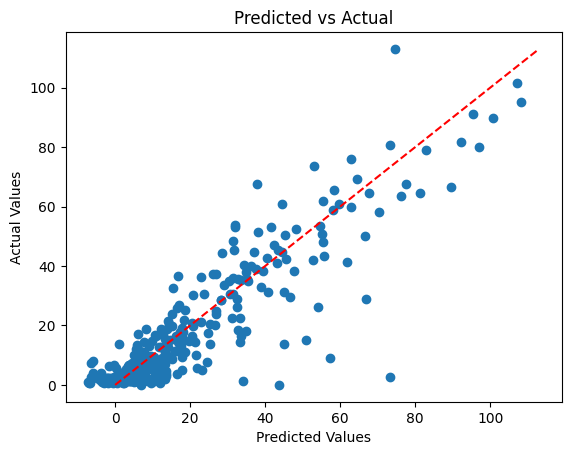

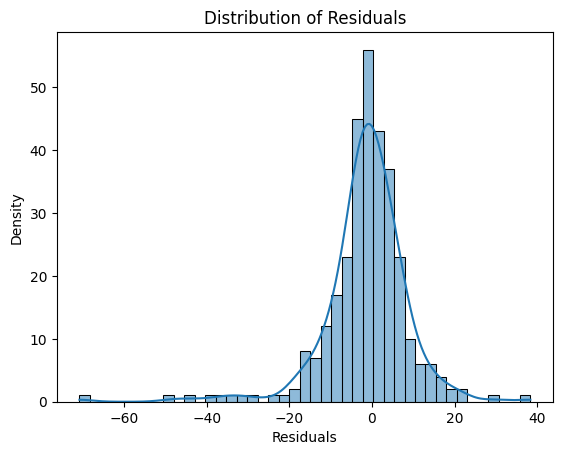

In [ ]:
#30m56s
# Define the parameter distribution for the ANN
param_dist = {
    'mlpregressor__hidden_layer_sizes': randint(50, 201),
    'mlpregressor__activation': ['identity', 'logistic', 'tanh', 'relu'],
    'mlpregressor__solver': ['sgd', 'adam'],
    'mlpregressor__alpha': uniform(0.0001, 1),
    'mlpregressor__n_iter_no_change': randint(5, 20),
    'mlpregressor__early_stopping': [True, False],
    'mlpregressor__learning_rate_init': uniform(0.0001, 0.01),
    'mlpregressor__shuffle': [True, False],
    'mlpregressor__tol': uniform(1e-5, 1e-3),
    'mlpregressor__warm_start': [True, False],
    'mlpregressor__learning_rate': ['constant', 'invscaling', 'adaptive'],
    'mlpregressor__power_t': uniform(0.1, 1.0),
    'mlpregressor__momentum': uniform(0.1, 1),
    'mlpregressor__nesterovs_momentum': [True, False],
    'mlpregressor__beta_1': uniform(0, 1.0),
    'mlpregressor__beta_2': uniform(0, 1.0),
    'mlpregressor__epsilon': [1e-8, 1e-7, 1e-9],
    'mlpregressor__validation_fraction': uniform(0.1, 1),
    'mlpregressor__batch_size': ['auto', 100, 200]
}


# Perform random search with cross-validation on the training set
random_search = RandomizedSearchCV(pipe_ANN, param_distributions=param_dist, n_iter=15, cv=5, scoring='neg_mean_squared_error', random_state=12)
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print(f"Best hyperparameters: {random_search.best_params_}")

# Train the model with the best hyperparameters on the training set
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mse_test ** 0.5
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print()
print(f"ANN test Root Mean Squared Error: {rmse_test}")
print(f"ANN test Mean Absolute Error: {mae_test}")
print(f"ANN test R-squared: {r2_test}")

# Evaluate the best model using cross-validation and report R2, RMSE, MAE, and STD
cv_r2_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
cv_rmse_scores = np.sqrt(-cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
cv_mae_scores = -cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

cv_r2_mean = np.mean(cv_r2_scores)
cv_rmse_mean = np.mean(cv_rmse_scores)
cv_mae_mean = np.mean(cv_mae_scores)

cv_r2_se = sem(cv_r2_scores)
cv_rmse_se = sem(cv_rmse_scores)
cv_mae_se = sem(cv_mae_scores)

print()
print(f"ANN cross-validation mean R-squared: {cv_r2_mean} +/- {cv_r2_se}")
print(f"ANN cross-validation mean RMSE: {cv_rmse_mean} +/- {cv_rmse_se}")
print(f"ANN cross-validation mean MAE: {cv_mae_mean} +/- {cv_mae_se}")

residuals = y_test - y_pred_test

# Plotting the predicted vs actual values
plt.scatter(y_pred_test, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs Actual')
plt.show()

sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution of Residuals')
plt.show()